In [38]:
# plot psth 
import pathlib as Path
from natsort import os_sorted
import pickle
import matplotlib.pyplot as plt
import numpy as np


In [56]:
# I have created a PSTH file for each channel per session organized by stimuli
# in the order of presentations that match stim_info_sess
# if the entries are nan, it means that the trial was not presented because the monkey broke fixation or something happened on the software 
# or the imec trigger wasn't recorded. You can check this in stim_info_sess as well.
# You can find the code used to generate this PSTH in utils_ephys.py. The function is get_data_bystim

# e.g.) ch000_psth_stim
# is a dictionary with keys corresponding to stimulus id

# load stim_info_sess to check other information about the specific presentation of the particular stimulus

base_save_out_path =  Path.Path('/Volumes/issa-locker/users/Younah/ephys/') # Currently all the processed data are saved here
monkey = 'West'
date = '20230830'
save_out_path = os_sorted((base_save_out_path /monkey).glob('*' + str(date) + '*'))[0]

stim_info_sess = pickle.load(open(save_out_path / 'stim_info_sess','rb'))
stim_list = list(stim_info_sess.keys())


# let's see psth for channel 40
ch = 40
psth = pickle.load(open(save_out_path / 'ch{:0>3d}_psth_stim'.format(ch),'rb'))
psth_meta = pickle.load(open(save_out_path / 'ch{:0>3d}_psth_stim_meta'.format(ch),'rb'))

In [57]:
print(stim_list[0])
print(stim_info_sess[stim_list[0]])
print(psth_meta[stim_list[0]]['n_trials']) # should match the number of non nan rows in psth

face/oldman_es_v2.glb_sz_7_posX_0_posY_3.5_posZ_0_rotX_0_rotY_0_rotZ_0_binoculars/e158ee130ac54392b4be7c09fb7557de.glb_sz_5_posX_-3.031088913245535_posY_-1.75_posZ_0_rotX_0_rotY_0_rotZ_0_apple/dc5a0c0c439942d58d038a10d7064c91.glb_sz_5_posX_3.031088913245535_posY_-1.75_posZ_0_rotX_0_rotY_0_rotZ_0_background/13_sz_200_light00_posX_0_posY_20_posZ_1_light01_posX_0_posY_1_posZ_1_camera00_posX_-110_posY_0_posZ_1.3471114790620885e-14_targetX_0_targetY_0_targetZ_0_img_huerotate_0_obj_huerotate_0
{'stim_ind': array([   0, 1601, 1639, 1691, 1725, 1794, 1863, 1960, 2159, 2222, 2256,
       2609, 3137, 3144]), 't_on': array([ 294.63263333, 2257.2084    , 2289.84833333, 2349.38406667,
       2384.66296667, 2472.22263333, 2572.05286667, 2692.3219    ,
                 nan, 3590.16163333, 3631.35683333, 4025.927     ,
       4850.0113    , 4858.71353333]), 't_on_mk': array([ 294.64792333, 2257.20975   , 2289.85200333, 2349.38635667,
       2384.66440667, 2472.22403333, 2572.05385667, 2692.32403   ,
 

In [32]:
# length of psth should match the length of arrays in stim_info_sess for the given stimulus

assert len(stim_info_sess[stim_list[0]]['t_on']) == psth[stim_list[0]].shape[0]

In [47]:
stim_list[0]

'face/oldman_es_v2.glb_sz_7_posX_0_posY_3.5_posZ_0_rotX_0_rotY_0_rotZ_0_binoculars/e158ee130ac54392b4be7c09fb7557de.glb_sz_5_posX_-3.031088913245535_posY_-1.75_posZ_0_rotX_0_rotY_0_rotZ_0_apple/dc5a0c0c439942d58d038a10d7064c91.glb_sz_5_posX_3.031088913245535_posY_-1.75_posZ_0_rotX_0_rotY_0_rotZ_0_background/13_sz_200_light00_posX_0_posY_20_posZ_1_light01_posX_0_posY_1_posZ_1_camera00_posX_-110_posY_0_posZ_1.3471114790620885e-14_targetX_0_targetY_0_targetZ_0_img_huerotate_0_obj_huerotate_0'

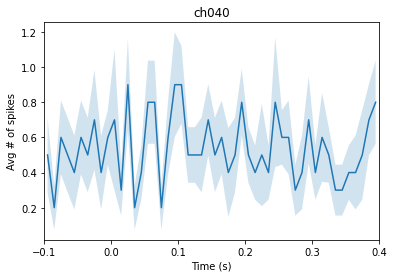

In [46]:

fig,ax = plt.subplots()
psth_mean = np.nanmean(psth[stim_list[0]],axis = 0)
psth_sem = np.nanstd(psth[stim_list[0]], axis=0)/np.sqrt(psth_meta[stim_list[0]]['n_trials'])
bincents = psth_meta[stim_list[0]]['psth_bins'] - psth_meta[stim_list[0]]['binwidth']/2
bincents = bincents[1:]
t_before = psth_meta[stim_list[0]]['t_after']
t_after = psth_meta[stim_list[0]]['t_after']
stim_dur = psth_meta[stim_list[0]]['stim_dur']
 

ax.plot(bincents, psth_mean)
ax.fill_between(bincents, psth_mean-psth_sem, psth_mean+psth_sem,
    alpha=0.2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Avg # of spikes')
ax.set_xlim([-t_before, stim_dur + t_after])
ax.set_title('ch{:0>3d}'.format(ch))
plt.show()

In [48]:

# I've also created a file for baseline activity 
# I took the mean activity from -200 to 0ms before the onset of a trial
# Now a trial can be an rsvp sequence of multiple stimuli, so all stimuli within a trial should have the same baseline

psth_bl_stim = pickle.load(open(save_out_path / 'ch{:0>3d}_psth_bl_stim'.format(ch),'rb'))
psth_bl = pickle.load(open(save_out_path / 'ch{:0>3d}_psth_bl'.format(ch),'rb')) # baseline for all presetations for this channel in this session
